# 自行開發『梯度提升決策樹』(Gradient Boosting Decision Tree)

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

## 載入資料集

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

## 資料分割

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 建立Gradient Boost模型

In [5]:
from sklearn.tree import DecisionTreeRegressor

class GradientBooster:
    # 初始化
    def __init__(self, max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.1, num_iter=1000):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0
        
    # 計算 MSE
    def __calculate_loss(self,y, y_pred):
        loss = (1/len(y)) * 0.5 * np.sum(np.square(y-y_pred))
        return loss
    
    # 計算梯度
    def __take_gradient(self, y, y_pred):
        grad = -(y-y_pred)
        return grad
    
    # 單一模型訓練
    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(criterion='squared_error',max_depth=self.max_depth,
                                    min_samples_split=self.min_samples_split,
                                    min_samples_leaf=self.min_samples_leaf,
                                    max_features=self.max_features)
        base.fit(X,y)
        return base
    
    # 預測
    def predict(self,models,X):
        pred_0 = np.array([self.y_mean] * X.shape[0])
        pred = pred_0 #.reshape(len(pred_0),1)
        
        # 加法模型預測
        for i in range(len(models)):
            temp = models[i].predict(X)
            pred -= self.lr * temp
        
        return pred
    
    # 模型訓練
    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred = np.array([np.mean(y)] * len(y))
        
        # 加法模型訓練
        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            base = self.__create_base_model(X, grads)
            r = base.predict(X)
            pred -= self.lr * r
            models.append(base)
            
        return models, losses, pred

## 模型訓練

In [6]:
G = GradientBooster()
models, losses, pred = G.train(X_train,y_train)

## 繪製損失函數

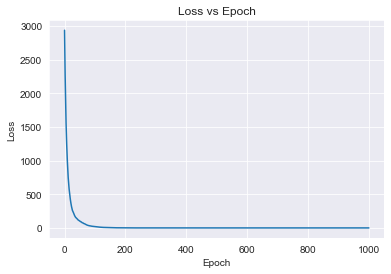

In [7]:
import seaborn as sns
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(1000),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch');

## 模型評估

In [8]:
from sklearn.metrics import mean_squared_error
y_pred = G.predict(models, X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 62.47630199377564


## 個別模型評估

In [9]:
model = DecisionTreeRegressor(max_depth=8,min_samples_split=5,
                                    min_samples_leaf=5,max_features=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 75.54768636162939


## Scikit-learn GradientBoostingRegressor 模型評估

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000,criterion='squared_error',
                                    max_depth=8,min_samples_split=5,
                                    min_samples_leaf=5,max_features=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 60.69114783838949


## Scikit-learn GradientBoostingClassifier 模型評估

In [11]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9229166666666667